# Curse of dimensionality

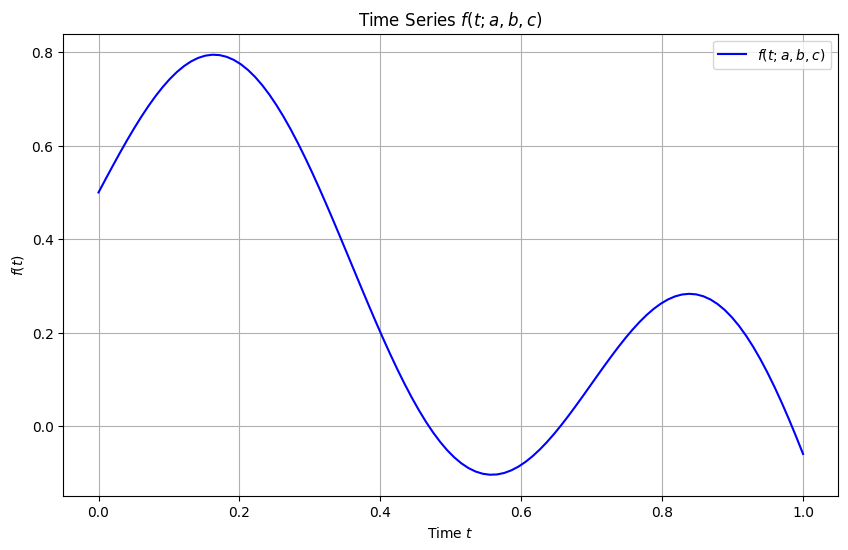

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

# Example usage
# Define parameters
a = 0.1
b = -0.13
c = 9


# Define time range
t = np.linspace(0, 1, 100)  # time from 0 to 1 with 100 points

# Calculate f(t) for these parameters
f_values = f(t, a, b, c)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Time Series $f(t; a, b, c)$')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from ipywidgets import interactive
import ipywidgets as widgets


def plot_with_parameters(a, b, c):
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, b, c)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

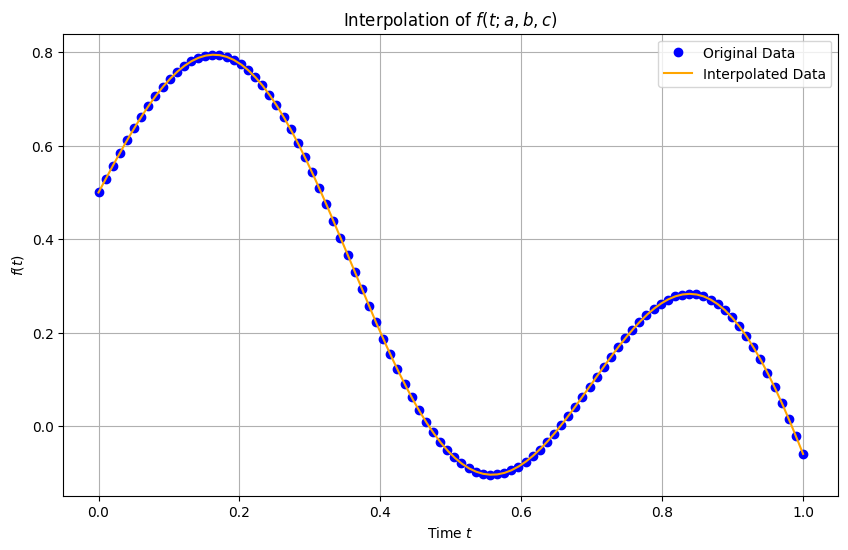

In [18]:
from scipy import interpolate

t = np.linspace(0, 1, 100)

f_values = f(t, a, b, c)

F_interp_t = interpolate.interp1d(t, f_values, kind='linear', fill_value="extrapolate")

t_interp = np.linspace(0, 1, 1001)
f_interp_values = F_interp_t(t_interp)
plt.figure(figsize=(10, 6))
plt.plot(t, f_values, 'o', label='Original Data', color='blue')
plt.plot(t_interp, f_interp_values, '-', label='Interpolated Data', color='orange')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Interpolation of $f(t; a, b, c)$')
plt.legend()
plt.grid(True)
plt.show()

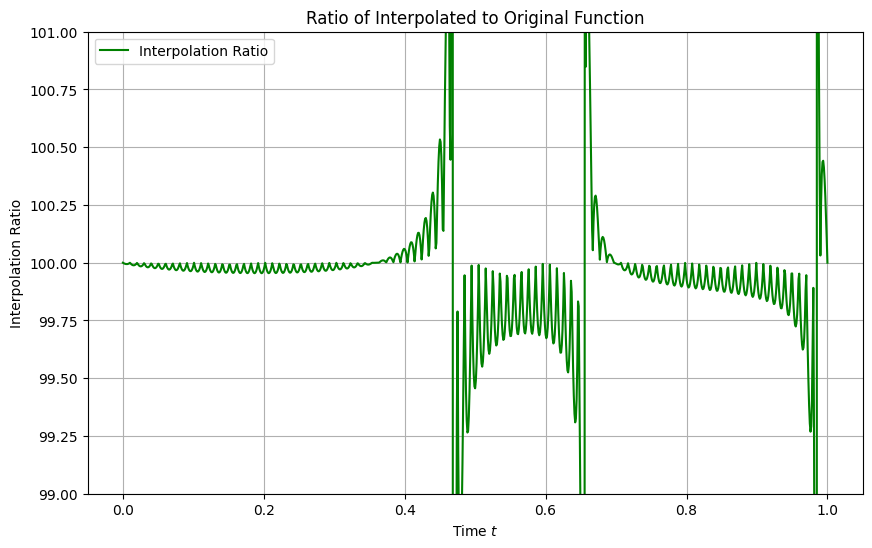

In [19]:
interp_ratio = 100 * f_interp_values / f(t_interp, a, b, c)

plt.figure(figsize=(10, 6))
plt.plot(t_interp, interp_ratio, label='Interpolation Ratio', color='green')
plt.xlabel('Time $t$')
plt.ylabel('Interpolation Ratio')
plt.ylim(99, 101)
plt.title('Ratio of Interpolated to Original Function')
plt.legend()
plt.grid(True)
plt.show()

                 1         2         3         4         5         6  \
0.000000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
0.010101  0.499898  0.530199  0.542750  0.552381  0.560500  0.567653   
0.020202  0.499592  0.560023  0.585055  0.604262  0.620454  0.634720   
0.030303  0.499082  0.589223  0.626560  0.655210  0.679363  0.700643   
0.040404  0.498368  0.617551  0.666918  0.704799  0.736734  0.764869   
...            ...       ...       ...       ...       ...       ...   
0.959596 -0.170695  0.097127  0.208063  0.293187  0.364950  0.428174   
0.969697 -0.180154  0.062714  0.163313  0.240505  0.305581  0.362914   
0.979798 -0.189539  0.026299  0.115702  0.184303  0.242137  0.293089   
0.989899 -0.198847 -0.011895  0.065544  0.124964  0.175058  0.219191   
1.000000 -0.208073 -0.051629  0.013172  0.062896  0.104815  0.141746   

                 7         8         9        10  
0.000000  0.500000  0.500000  0.500000  0.500000  
0.010101  0.574120  0.580067  0.5

<Axes: >

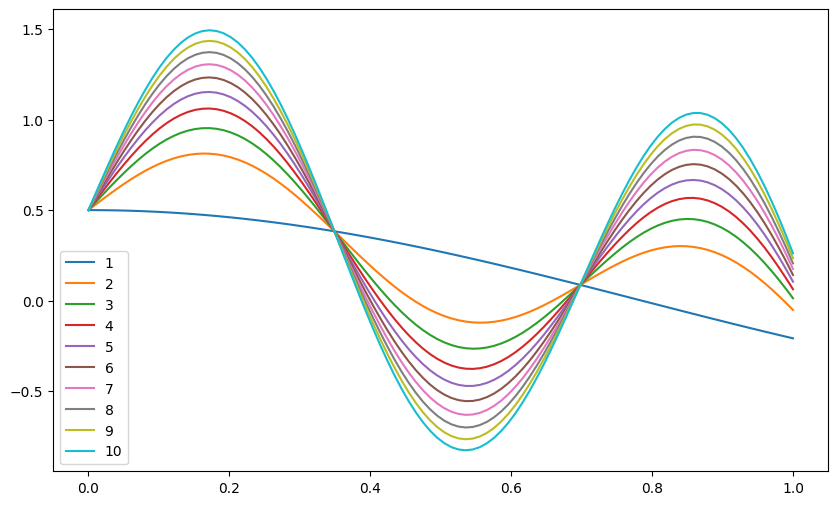

In [23]:
import pandas as pd

a_vals = np.linspace(0, 1, 10)
f_matrix = {str(i+1): f(t, a, b, c) for i, a in enumerate(a_vals)}

df = pd.DataFrame(f_matrix, index=t)
print(df)

df.plot(figsize=(10, 6))

In [27]:
from scipy.interpolate import RegularGridInterpolator

a_vals = np.linspace(0, 1, 10)
t = np.linspace(0, 1, 100)
f_values = df.values
print(f_values.shape)

interp_func = RegularGridInterpolator((t, a_vals), f_values, method='linear', bounds_error=False, fill_value=None)

# Define a function that interpolates over a new `a` value
def interpolate_f_over_a(new_a):
    # Create a mesh of (time, new_a) points
    query_points = np.array([(time, new_a) for time in t])

    # Interpolate at all time points for the given new `a`
    return interp_func(query_points)

(100, 10)


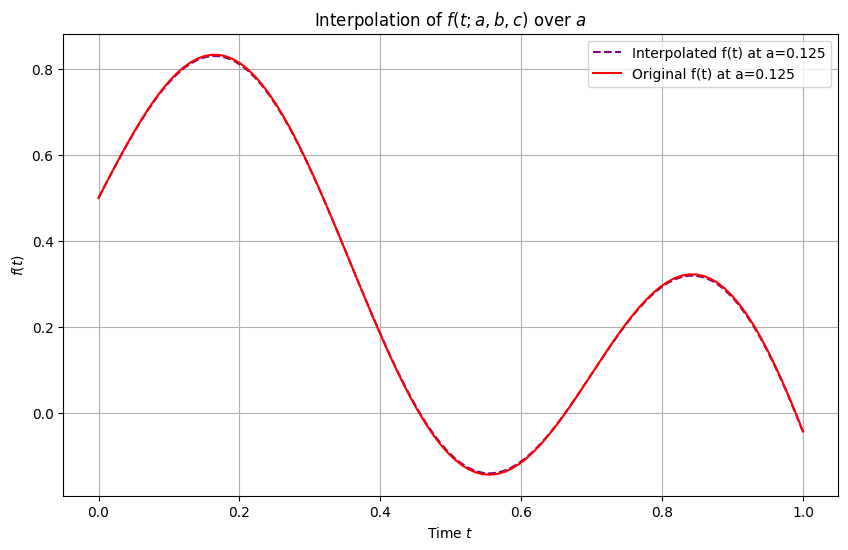

In [32]:
a_plot = 0.125
f_interp_a_values = interpolate_f_over_a(a_plot)
plt.figure(figsize=(10, 6))
plt.plot(t, f_interp_a_values, linestyle='dashed', label=f'Interpolated f(t) at a={a_plot}', color='purple')
plt.plot(t, f(t, a_plot, b, c), label=f'Original f(t) at a={a_plot}', color='red')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Interpolation of $f(t; a, b, c)$ over $a$')
plt.legend()
plt.grid(True)
plt.show()

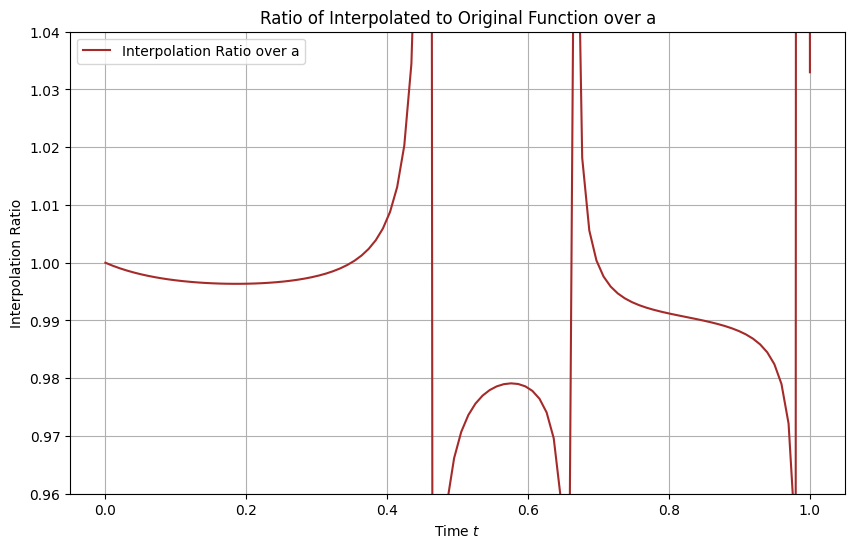

In [34]:
ratio = f_interp_a_values / f(t, a_plot, b, c)
plt.figure(figsize=(10, 6))
plt.plot(t, ratio, label='Interpolation Ratio over a', color='brown')
plt.xlabel('Time $t$')
plt.ylabel('Interpolation Ratio')
plt.ylim(0.96, 1.04)
plt.title('Ratio of Interpolated to Original Function over a')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Define the slider function to update the plot
def plot_interpolated_relative_difference(ap):
    # Calculate the relative difference
    r = 100 * (interpolate_f_over_a(ap) / f(t, ap, b, c) - 1.)

    # Plot the relative difference
    plt.figure(figsize=(10, 6))
    plt.plot(t, r)
    plt.xlabel('Time $t$')
    plt.ylabel(r'Relative Difference %')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.ylim(-10,10)
    plt.grid(True)
    plt.show()

# Define the slider for `ap`
ap_slider = FloatSlider(value=0.145, min=0., max=1.0, step=0.001, description='ap')

# Use `interact` to create the interactive plot
interact(plot_interpolated_relative_difference, ap=ap_slider)

interactive(children=(FloatSlider(value=0.145, description='ap', max=1.0, step=0.001), Output()), _dom_classes…

<function __main__.plot_interpolated_relative_difference(ap)>

In [36]:
import numpy as np
import pandas as pd
from scipy.interpolate import RegularGridInterpolator
from pyDOE import lhs  # For Latin Hypercube Sampling

# Define the ranges for `a`, `b`, and `t`
t = np.linspace(0, 1, 100)  # Time range with 100 points
a_range = (0., 1.0)
b_range = (-0.5, 0.5)

# Generate Latin Hypercube samples for `a` and `b`
n_samples = 100  # Define the number of samples for each parameter
lhs_samples = lhs(2, samples=n_samples)  # Latin Hypercube sampling in 2D



# Scale the samples to the range of `a` and `b`
a_values = a_range[0] + lhs_samples[:, 0] * (a_range[1] - a_range[0])
b_values = b_range[0] + lhs_samples[:, 1] * (b_range[1] - b_range[0])

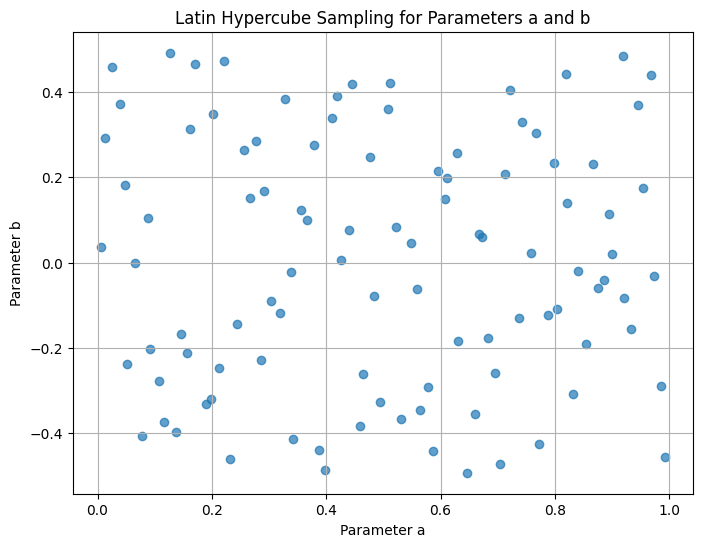

In [37]:
# Plot the Latin Hypercube samples as a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(a_values, b_values, alpha=0.7)
plt.xlabel("Parameter a")
plt.ylabel("Parameter b")
plt.title("Latin Hypercube Sampling for Parameters a and b")
plt.grid(True)
plt.show()

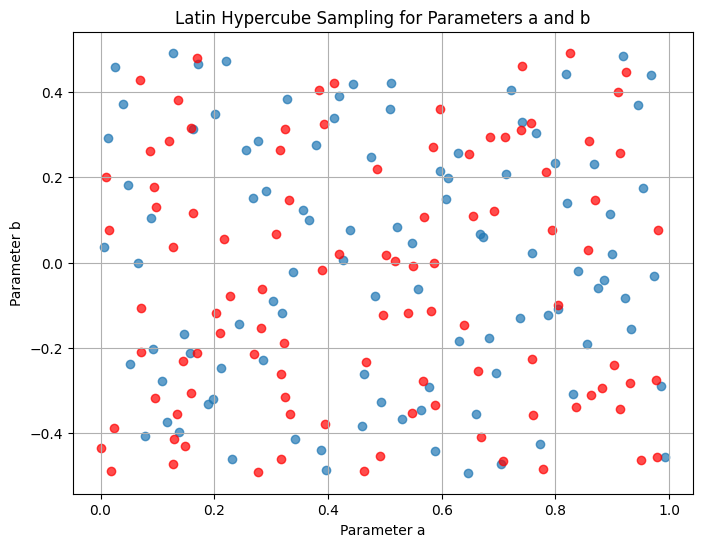

In [38]:
# Generate uniformly sampled values for `a` and `b`
ua_values = np.random.uniform(a_range[0], a_range[1], n_samples)
ub_values = np.random.uniform(b_range[0], b_range[1], n_samples)

# Plot the Latin Hypercube samples as a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(a_values, b_values, alpha=0.7)
plt.scatter(ua_values, ub_values, alpha=0.7,c='r')
plt.xlabel("Parameter a")
plt.ylabel("Parameter b")
plt.title("Latin Hypercube Sampling for Parameters a and b")
plt.grid(True)
plt.show()

In [39]:
t = np.linspace(0, 1, 100)  # Time range with 100 points, always fixed

from scipy.interpolate import griddata
# Generate function samples for each (a, b) pair over time `t`
# Create lists to hold points and values for interpolation
points = []  # Will store (t, a, b) tuples
values = []  # Will store corresponding f(t, a, b, c) values

for a, b in zip(a_values, b_values):
    for time in t:
        points.append((time, a, b))
        values.append(f(time, a, b, c))  # Replace `f` with your actual function definition

# Convert lists to NumPy arrays for griddata use
points = np.array(points)  # Shape: (len(t) * n_samples, 3)
values = np.array(values)  # Shape: (len(t) * n_samples,)

# Define a function to interpolate over new values of `a` and `b` using griddata
def interpolate_f_over_a_b(tgrid, new_a, new_b):
    # Create an array of (time, new_a, new_b) points to interpolate
    query_points = np.array([(time, new_a, new_b) for time in tgrid])

    # Use griddata to interpolate the function at the given points
    interpolated_values = griddata(points, values, query_points, method='linear')
    return interpolated_values